##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
    <h1 style = "font-size:48px; font-weight:normal"><b>AI</b>-TECH</h1>
    <br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">Przykład 3 DO LABORATORIUM 5</h1>
    <h1 style = "font-size:24px">z UCZENIA MASZYNOWEGO</h1>
    <h1 style = "font-size:24px">Sztuczne sieci neuronowe</h1>
    <h1 style = "font-size:24px">Tomasz Neumann</h1>
    <h3 style = "font-size:21px">Klasyfikacja przy użyciu Keras na zbiorze CIFAR-10 za pomocą prostej sieci neuronowej</h3>
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

![stopka.svg](stopka.svg)

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej" 
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

<hr>

# 5. Przykład 3

Keras to wyspecjalizowany, przeznaczony do uczenia głębokiego interfejs API, za pomocą którego
możemy z łatwością tworzyć, uczyć, oceniać i uruchamiać wszystkie rodzaje sieci neuronowych. W tym celu stworzymy klasyfikujący perceptron, który będzie pracował na danych CIFAR-10. Rozpoczynamy jak zwykle od dołączenia odpowiednich bibliotek

In [ ]:
import sys
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import time
from datetime import timedelta 

oraz ustawione zostaną parametry treningu.

In [ ]:
epochs=50
batch_size=32
lr = 0.001

Następnie pobrany zostanie zbiór danych CIFAR-10 zawierający zdjęcia przedstawione na poniższej grafice (zawiera obrazy rozłacznych klas: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck)
<table>
    <tbody><tr>
        <td class="cifar-class-name">airplane</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane1.png" alt="airplane" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane2.png" alt="airplane" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane3.png" alt="airplane" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane4.png" alt="airplane" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane5.png" alt="airplane" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane6.png" alt="airplane" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane7.png" alt="airplane" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane8.png" alt="airplane" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane9.png" alt="airplane" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane10.png" alt="airplane" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">automobile</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile1.png" alt="automobile" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile2.png" alt="automobile" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile3.png" alt="automobile"  class=" cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile4.png" alt="automobile" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile5.png" alt="automobile" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile6.png" alt="automobile" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile7.png" alt="automobile" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile8.png" alt="automobile" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile9.png" alt="automobile" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile10.png" alt="automobile" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">bird</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird1.png" alt="bird" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird2.png" alt="bird" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird3.png" alt="bird" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird4.png" alt="bird" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird5.png" alt="bird" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird6.png" alt="bird" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird7.png" alt="bird" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird8.png" alt="bird" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird9.png" alt="bird" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird10.png" alt="bird" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">cat</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat1.png" alt="cat" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat2.png" alt="cat" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat3.png" alt="cat" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat4.png" alt="cat" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat5.png" alt="cat" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat6.png" alt="cat" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat7.png" alt="cat" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat8.png" alt="cat" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat9.png" alt="cat" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat10.png" alt="cat" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">deer</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer1.png" alt="deer" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer2.png" alt="deer" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer3.png" alt="deer" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer4.png" alt="deer" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer5.png" alt="deer" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer6.png" alt="deer" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer7.png" alt="deer" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer8.png" alt="deer" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer9.png" alt="deer" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer10.png" alt="deer" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">dog</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog1.png" alt="dog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog2.png" alt="dog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog3.png" alt="dog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog4.png" alt="dog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog5.png" alt="dog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog6.png" alt="dog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog7.png" alt="dog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog8.png" alt="dog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog9.png" alt="dog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog10.png" alt="dog" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">frog</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog1.png" alt="frog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog2.png" alt="frog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog3.png" alt="frog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog4.png" alt="frog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog5.png" alt="frog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog6.png" alt="frog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog7.png" alt="frog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog8.png" alt="frog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog9.png" alt="frog" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog10.png" alt="frog" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">horse</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse1.png" alt="horse" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse2.png" alt="horse" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse3.png" alt="horse" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse4.png" alt="horse" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse5.png" alt="horse" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse6.png" alt="horse" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse7.png" alt="horse" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse8.png" alt="horse" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse9.png" alt="horse" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse10.png" alt="horse" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">ship</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship1.png" alt="ship" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship2.png" alt="ship" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship3.png" alt="ship" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship4.png" alt="ship" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship5.png" alt="ship" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship6.png" alt="ship" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship7.png" alt="ship" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship8.png" alt="ship" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship9.png" alt="ship" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship10.png" alt="ship" class="cifar-sample"></td>
    </tr>
    <tr>
        <td class="cifar-class-name">truck</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck1.png" alt="truck" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck2.png" alt="truck" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck3.png" alt="truck" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck4.png" alt="truck" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck5.png" alt="truck" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck6.png" alt="truck" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck7.png" alt="truck" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck8.png" alt="truck" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck9.png" alt="truck" class="cifar-sample"></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck10.png" alt="truck" class="cifar-sample"></td>
    </tr>
</tbody></table>
który zostaje automatycznie podzielony na zbiór treningowy oraz testowy. Ponadto kategorie z postaci wektora wartości liczbowych zostają zamienione na macierz binarną za pomocą metody <i>to_categorical()</i>.

In [ ]:
def load_dataset():
    #pobranie bazy danych obrazów
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # zamiena wektora etykiet obrazów na macierz binarną
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

W tym kroku zostanie przeprowadzonie skalowanie pikseli w obrazie na zakres  wartości od 0 do 1.

In [ ]:
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

Na tym etapie zostanie stworzony perceptron wielowarstwowy zawierający dwie warstwy ukryte.  Na początku tworzony jest tu model sekwencyjny (najprostsza forma modelu sieci neuronowej dostępna w Keras), a następnie tworzona jest warstwa spłaszczona, która przekształca obraz wejściowy w tablicę jednowymiarową. Warstwa ta nie zawiera żadnych parametrów, a jej jedynym celem jest proste, wstępne przetworzenie danych. W dalszej kolejności zdefiniowana zostaje gęsta warstwa ukryta (Dense) składającą się z 300 neuronów, a następnie kolejną ze 100 neuronami. Na koniec określona zostaje gęsta warstwa wyjściowa składająca się z 10 neuronów (po jednym na każdą klasę) z wyznaczoną funkcją aktywacji softmax (ponieważ klasy wykluczają się wzajemnie).

In [ ]:
def define_model():
    model = Sequential()
    model.add(Flatten(input_shape=[32, 32,3]))
    model.add(Dense(300, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    opt = SGD(learning_rate=lr, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model  


Pomocna także będzie funkcja wykreślająca diagnostycznie zachowanie się funkcji straty oraz dokładności z epoki na epokę.

In [ ]:
def summarize_diagnostics(history):
    # wykreślenie wykresu funkcji straty w zależności od epoki
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()
    plt.show()
    # wykreślenie wykresu dokładności w zależności od epoki
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()
    plt.show()

Ostatecznie można zaimplementować metodę testującą zaproponowany model na wybranym zbiorze danych

In [ ]:
def run_test():
    # załadowanie danych wejściowych i ich wstępna transformacja
    trainX, trainY, testX, testY = load_dataset()
    # skalowanie wartości pikseli
    trainX, testX = prep_pixels(trainX, testX)
    # wybranie modelu
    model = define_model()
    model.summary()
    # trenowanie modelu
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(testX, testY), verbose=0)

    # ewaluacja modelu
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # wykreślenie krzywych diagnostycznych
    summarize_diagnostics(history)

oraz ją wywołać.

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 300)               921900    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________
> 53.610


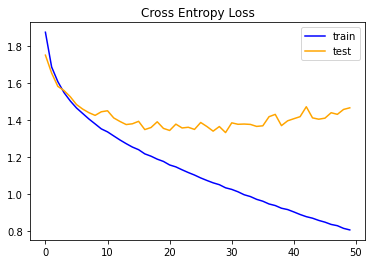

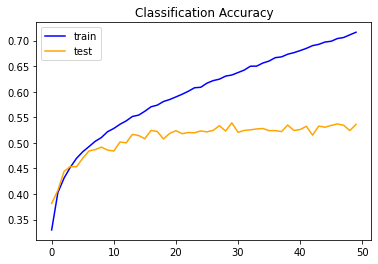

Czas wykonania: 0:02:55 sekund


In [ ]:
start_time = time.time()
run_test()
elapsed_time_secs = time.time() - start_time
msg = "Czas wykonania: %s sekund" % timedelta(seconds=round(elapsed_time_secs))
print(msg)

Jak widać powyższy model jest w stanie nauczyć się zestawu danych uczących, wykazując poprawę w zestawie danych uczących do conajmniej 30 epoki. Należy jednak także zauważyć, że model ten wykazuje nadmierne dopasowanie po 20-tej epoce patrząc na wyniki zbioru testowego. Wynik ten sugeruje, że ten prosty model wymaga pewnego uregulowania w celu rozwiązania nadmiernego dopasowania  tj. overfittingu. Wyniki sugerują, że przydatne może być zbadanie technik, które spowolnią zbieżność (szybkość uczenia się) modelu.
W celu zapobiegania overfitingowi można:
<b> zastosować warstwę <i>Dropout()</i></b>

In [18]:
#definicja modelu z warstwą Dropout
def define_model():
    model = Sequential()
    model.add(Flatten(input_shape=[32, 32,3]))
    model.add(Dense(300, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    
    opt = SGD(learning_rate=lr, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 300)               921900    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
________________________________________________

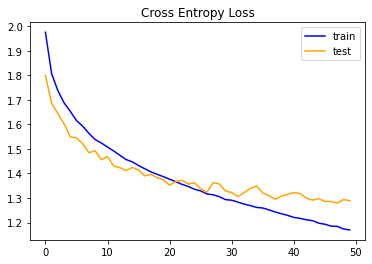

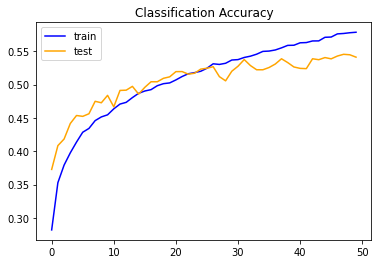

Czas wykonania: 0:02:59 sekund


In [19]:
start_time = time.time()
run_test()
elapsed_time_secs = time.time() - start_time
msg = "Czas wykonania: %s sekund" % timedelta(seconds=round(elapsed_time_secs))
print(msg)

poprzez którą losowo usuwane są z sieci (z warstw wewnętrznych, czasami również wejściowych) pojedyncze neurony w trakcie uczenia. Ponieważ skomplikowane sieci, szczególnie dysponujące relatywnie niewielkimi ilościami danych uczących, mają tendencję do dokładnego dopasowywania się do danych, to taki sposób deregulacji zmusza je do uczenia w sposób bardziej zgeneralizowany.

Można także <b> zastosować regularyzację wag</b>

In [ ]:
#definicja modelu z regularyzacją
from tensorflow.keras import regularizers
def define_model():
    model = Sequential()
    model.add(Flatten(input_shape=[32, 32,3]))
    model.add(Dense(300, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dense(10, activation='softmax'))
    
    opt = SGD(learning_rate=lr, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               921900    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
________________________________________________

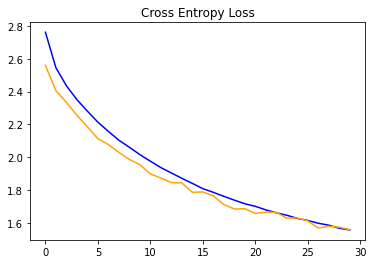

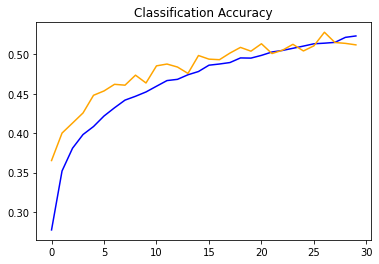

Czas wykonania: 0:07:51 sekund


In [ ]:
start_time = time.time()
run_test()
elapsed_time_secs = time.time() - start_time
msg = "Czas wykonania: %s sekund" % timedelta(seconds=round(elapsed_time_secs))
print(msg)

w tym przypadku regularyzacje $L2$ (znaną również jako zanik wagi), która dodaje "kwadrat wielkości" jako warunek kary do funkcji straty.

Można także <b> zastosować augmentację</b> czyli rozszerzenie zbioru danych uczących jak i umożliwia to modelowi poznanie tych samych ogólnych cech, choć w bardziej uogólniony sposób.

In [ ]:
def run_test2():
    trainX, trainY, testX, testY = load_dataset()
    trainX, testX = prep_pixels(trainX, testX)
    model = define_model()
    #augmentacja
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    it_train = datagen.flow(trainX, trainY, batch_size=64)
    steps = int(trainX.shape[0] / 64)
    history = model.fit(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(testX, testY), verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    summarize_diagnostics(history)
    
def define_model():
    model = Sequential()
    model.add(Flatten(input_shape=[32, 32,3]))
    model.add(Dense(300, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    opt = SGD(learning_rate=lr, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model  
    
    opt = SGD(learning_rate=lr, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

> 52.980


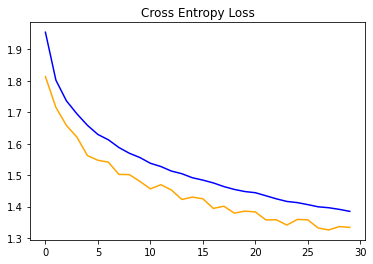

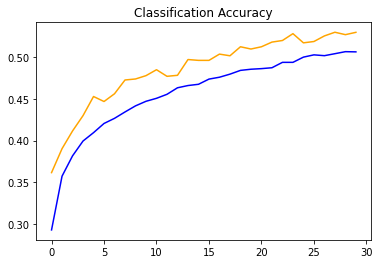

Czas wykonania: 0:17:38 sekund


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
start_time = time.time()
run_test2()
elapsed_time_secs = time.time() - start_time
msg = "Czas wykonania: %s sekund" % timedelta(seconds=round(elapsed_time_secs))
print(msg)

Biorąc pod uwagę, że zbiór danych składa się z małych zdjęć obiektów, nie należy używać augmentacji, która zbyt mocno zniekształca obrazy, aby można było zachować i wykorzystać przydatne cechy obrazów.

Szeroko stosowaną techniką regularyzacji w uczeniu głębokim jest także <b>Wczesne zatrzymanie</b>, która polega na zatrzymaniu treningu, gdy wzrasta błąd uogólnienia.

# Zadania do wykonania (Do wyboru)

<p><b>Zadanie 1</b></p>
Przetestuj zachowanie się modelu przy zastosowaniu optymalizatora RMSprop, Adam i Nadam. 
<p><b>Zadanie 2</b></p>
Do modelu dodaj warstwy Dropout i przeprowadź eksperymenty z wartościami 0.1, 0.3 i 0.5.
<p><b>Zadanie 3</b></p>
Czy dodanie regularyzacji wag w warstwach Dense (kernel_regularizer) o wartościach 0.01, 0.05 i 0.1 zmieni zachowanie modelu.
<p><b>Zadanie 4</b></p>
Zbadaj wpływ augmentacji na wynik końcowy modelu dodając <i>rotation_range</i> lub <i>shear_range</i> lub <i>zoom_range</i>.
<p><b>Zadanie 5</b></p>
Zbadaj wpływ głębokości modelu na jakość jego treningu.

![stopka.svg](stopka.svg)